In [379]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [380]:
df=pd.read_csv("dataTest.csv")

In [381]:
df=pd.DataFrame(df)
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,psnr,ssim_first,ssim_second,type,server
0,h1,1898.137,0.0,66,4,3000000,2011.425000,31.225948,0.985150,18.282783,3,h10
1,h2,2240.660,0.0,44,3,3000000,1859.161290,31.225948,0.985150,18.282674,3,h14
2,h3,2196.294,0.0,40,2,3000000,9084.620155,22.700112,0.956348,13.599976,3,h14
3,h4,1298.732,0.0,60,3,3000000,25815.963636,22.301604,0.960533,14.037636,3,h14
4,h5,338.105,0.0,92,4,3000000,37246.273632,22.510259,0.958593,13.829213,3,h10


In [382]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,492.0,8.343111e+02,9.619482e+02,1.520560e+02,2.643825e+02,3.402140e+02,8.015897e+02,4.744949e+03
packetLoss,492.0,2.303523e+00,6.117817e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.444444e+01
latency,492.0,8.019512e+01,5.996848e+01,1.300000e+01,5.600000e+01,7.600000e+01,9.400000e+01,1.035000e+03
hopCount,492.0,3.085366e+00,1.017579e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,492.0,6.575203e+06,3.065549e+06,3.000000e+06,3.000000e+06,5.000000e+06,1.000000e+07,1.000000e+07
yukOrani,492.0,2.728751e+04,2.435523e+04,2.242926e+02,7.715098e+03,2.185979e+04,4.177688e+04,1.770201e+05
psnr,492.0,3.119863e+01,1.684782e+01,1.187769e+01,1.637717e+01,2.235940e+01,5.505260e+01,5.506194e+01
ssim_first,492.0,8.663380e-01,1.503713e-01,4.735960e-01,7.113947e-01,9.549805e-01,9.997650e-01,9.997650e-01
ssim_second,492.0,1.781643e+01,1.313828e+01,2.786809e+00,5.396959e+00,1.346600e+01,3.628070e+01,3.628266e+01
type,492.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


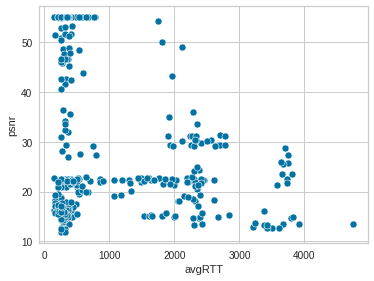

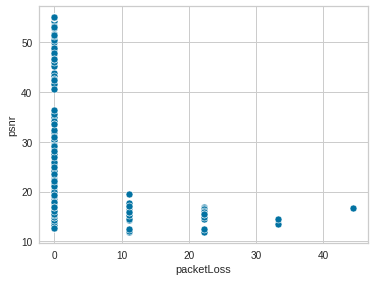

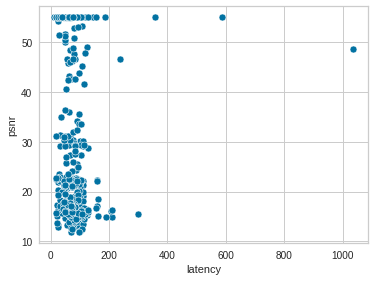

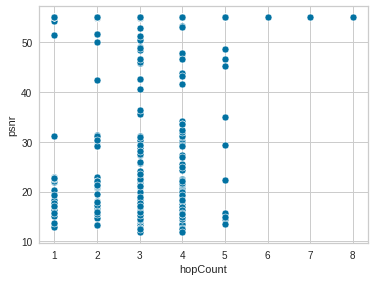

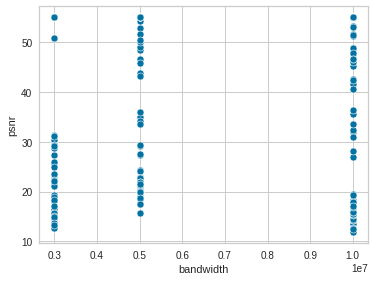

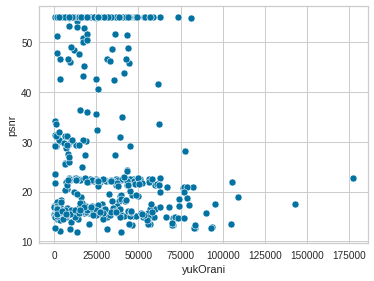

In [383]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [384]:
# sns.displot(df)

In [385]:
y=df["ssim_first"]
x=df.drop(["host","ssim_first","ssim_second","type","psnr","server"],axis="columns")
y


0      0.985150
1      0.985150
2      0.956348
3      0.960533
4      0.958593
         ...   
489    0.755503
490    0.680385
491    0.816703
492    0.736152
493    0.697046
Name: ssim_first, Length: 492, dtype: float64

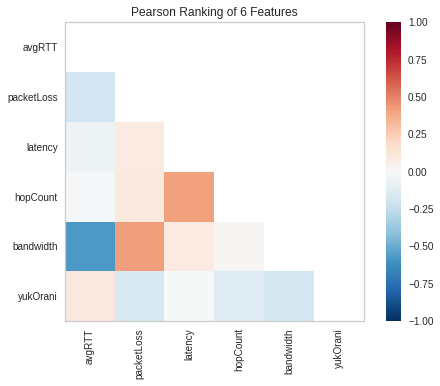

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [386]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [387]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,492.0,8.343111e+02,9.619482e+02,1.520560e+02,2.643825e+02,3.402140e+02,8.015897e+02,4.744949e+03
packetLoss,492.0,2.303523e+00,6.117817e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.444444e+01
latency,492.0,8.019512e+01,5.996848e+01,1.300000e+01,5.600000e+01,7.600000e+01,9.400000e+01,1.035000e+03
hopCount,492.0,3.085366e+00,1.017579e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,492.0,6.575203e+06,3.065549e+06,3.000000e+06,3.000000e+06,5.000000e+06,1.000000e+07,1.000000e+07
yukOrani,492.0,2.728751e+04,2.435523e+04,2.242926e+02,7.715098e+03,2.185979e+04,4.177688e+04,1.770201e+05


In [388]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.5, random_state=42)

In [389]:
from sklearn.linear_model import LinearRegression
LinModel=LinearRegression()
LinModel.fit(XTrain,yTrain)
tahmin=LinModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.3117844095095007


In [390]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.26774463052241293 test: 0.2692584279508845
max_depth : 2 --> score r2 : eğitim:0.4478330605787112 test: 0.36326300481818163
max_depth : 3 --> score r2 : eğitim:0.5784549599392176 test: 0.46154115553991604
max_depth : 4 --> score r2 : eğitim:0.6511925917793904 test: 0.484609623506689
max_depth : 5 --> score r2 : eğitim:0.755116670140946 test: 0.5287151914061814
max_depth : 6 --> score r2 : eğitim:0.8260755152538057 test: 0.5346462097324206
max_depth : 7 --> score r2 : eğitim:0.8766114014548194 test: 0.5235640114410893
max_depth : 8 --> score r2 : eğitim:0.9193197570536561 test: 0.516303260749591
max_depth : 9 --> score r2 : eğitim:0.9391065870265888 test: 0.4991837828551481
max_depth : 10 --> score r2 : eğitim:0.9469641848970239 test: 0.5039066773189596
max_depth : 11 --> score r2 : eğitim:0.9502601487931926 test: 0.48787305495804345
max_depth : 12 --> score r2 : eğitim:0.9519069437613624 test: 0.4782229317090517
max_depth : 13 --> score r2 : eğitim

In [391]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: -0.1548803225826012
n_neigbors : 2 --> score r2 : eğitim:0.7379764812966731 test: 0.19839227446821994
n_neigbors : 3 --> score r2 : eğitim:0.6393201188615494 test: 0.25417540135538963
n_neigbors : 4 --> score r2 : eğitim:0.6020976437409653 test: 0.3038050921338197
n_neigbors : 5 --> score r2 : eğitim:0.5977916336512749 test: 0.32423243834726445
n_neigbors : 6 --> score r2 : eğitim:0.582321110807358 test: 0.34855376376823966
n_neigbors : 7 --> score r2 : eğitim:0.5731800279718604 test: 0.3497847176125106
n_neigbors : 8 --> score r2 : eğitim:0.5653071688794153 test: 0.3642444776946372
n_neigbors : 9 --> score r2 : eğitim:0.542731580113001 test: 0.36618657104304986
n_neigbors : 10 --> score r2 : eğitim:0.5404299495205089 test: 0.3723012962349682
n_neigbors : 11 --> score r2 : eğitim:0.5523398444404031 test: 0.3815719445817163
n_neigbors : 12 --> score r2 : eğitim:0.5423834358093469 test: 0.3746828687630087
n_neigbors : 13 --> score r2 : eğiti

In [392]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.25400484622576047 test: 0.263429312023464


max_depth : 2 --> score r2 : eğitim:0.4060333796873429 test: 0.23850460533255857
max_depth : 3 --> score r2 : eğitim:0.49450526033505493 test: 0.4101867036945527
max_depth : 4 --> score r2 : eğitim:0.6497748118727547 test: 0.5051792289658911
max_depth : 5 --> score r2 : eğitim:0.7389043482166614 test: 0.3727771195505819
max_depth : 6 --> score r2 : eğitim:0.821255662602485 test: 0.4135020614437229
max_depth : 7 --> score r2 : eğitim:0.8761846961574423 test: 0.4195226629652401
max_depth : 8 --> score r2 : eğitim:0.9097951991113545 test: 0.35560346494990835
max_depth : 9 --> score r2 : eğitim:0.9546943195062423 test: 0.28627625051917316
max_depth : 10 --> score r2 : eğitim:0.976977568666778 test: 0.2950702725025257
max_depth : 11 --> score r2 : eğitim:0.9907673765169206 test: 0.24462900073528804
max_depth : 12 --> score r2 : eğitim:0.9995661139610573 test: 0.21925031628299463
max_depth : 13 --> score r2 : eğitim:0.9999110948177423 test: 0.1952518479760572
max_depth : 14 --> score r2 : eğ

In [393]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.537888125197576 test: 0.3927000537607821
max_depth : 2 --> score r2 : eğitim:0.7962640817801152 test: 0.49194764247367107
max_depth : 3 --> score r2 : eğitim:0.9027947024380659 test: 0.5037514851057314
max_depth : 4 --> score r2 : eğitim:0.9665124135262546 test: 0.5012040098252204
max_depth : 5 --> score r2 : eğitim:0.9916497050050475 test: 0.5023340126617293
max_depth : 6 --> score r2 : eğitim:0.9981831049683099 test: 0.4662178973609242
max_depth : 7 --> score r2 : eğitim:0.9996499783047634 test: 0.4594760774796971
max_depth : 8 --> score r2 : eğitim:0.9999535545962706 test: 0.4012459907388747
max_depth : 9 --> score r2 : eğitim:0.9999942174876842 test: 0.33148075332392013


In [394]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(XTrain,yTrain)
tahminXGB=xgb.predict(XTest)
print(r2_score(yTest,tahminXGB))

0.4772592841982557


In [395]:
from sklearn.linear_model import RANSACRegressor
ransac=RandomForestRegressor(random_state=42)
ransac.fit(XTrain,yTrain)
tahminRansac=ransac.predict(XTest)
print(f"ransac -> {r2_score(yTest,tahminRansac)}")

ransac -> 0.5031824130809641


In [396]:
from sklearn.ensemble import ExtraTreesRegressor
for i in range(1,10,1):
    exTree=ExtraTreesRegressor(max_depth=i)
    exTree.fit(XTrain,yTrain)
    tahminExTree=exTree.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,exTree.predict(XTrain))} test: {r2_score(yTest,tahminExTree)}")

max_depth : 1 --> score r2 : eğitim:0.21574362730177565 test: 0.21331132638587802
max_depth : 2 --> score r2 : eğitim:0.3949290166727176 test: 0.34750520905512416
max_depth : 3 --> score r2 : eğitim:0.5042245570856099 test: 0.41412235100548045
max_depth : 4 --> score r2 : eğitim:0.6272820207482693 test: 0.5008269218171246
max_depth : 5 --> score r2 : eğitim:0.729654709691441 test: 0.5428999638361509
max_depth : 6 --> score r2 : eğitim:0.7772014369731035 test: 0.5390253497990726
max_depth : 7 --> score r2 : eğitim:0.8307416413187483 test: 0.5349344902952765
max_depth : 8 --> score r2 : eğitim:0.8862847208276254 test: 0.5291579808295142
max_depth : 9 --> score r2 : eğitim:0.9140302229798472 test: 0.5327806390187412


In [397]:
tahminGbr

array([0.98561018, 0.93993902, 0.91686089, 0.9997457 , 0.99630069,
       0.88771781, 0.92380934, 0.91810088, 0.97616447, 1.0068351 ,
       0.94869668, 0.95864948, 1.00038406, 0.85667432, 0.97616471,
       0.9959367 , 0.99780732, 0.9784795 , 0.99718075, 0.69642472,
       0.65953161, 0.9653554 , 0.66232403, 0.65831476, 0.99345108,
       0.71305257, 0.69439137, 1.00393747, 0.97641682, 0.93284698,
       0.99461829, 0.80016713, 0.55756036, 1.00388971, 0.95509552,
       0.92540808, 0.98600886, 0.74156394, 1.00094308, 0.70054286,
       1.00670121, 0.99832803, 0.99946888, 0.98808622, 0.92847257,
       0.88475091, 0.98669396, 0.6736083 , 0.99078284, 0.980621  ,
       0.99594642, 0.99859243, 0.55799297, 0.98114263, 1.00440097,
       1.00332883, 0.94806731, 0.93718006, 0.86784803, 0.95908327,
       0.53891525, 0.70165634, 0.98781001, 0.84489419, 0.93216697,
       0.96106572, 0.66727337, 0.68064001, 1.00333489, 0.95960953,
       1.0026889 , 0.95765457, 0.71990966, 0.93564535, 0.99993

In [398]:
yTest

79     0.999765
55     0.956700
273    0.916340
287    0.999765
63     0.999765
         ...   
290    0.999765
199    0.802060
483    0.750866
388    0.710734
249    0.778932
Name: ssim_first, Length: 246, dtype: float64

In [399]:
yTrain

195    0.952839
90     0.999765
147    0.999765
164    0.969434
349    0.999765
         ...   
107    0.999756
271    0.534366
350    0.999765
437    0.680401
103    0.999765
Name: ssim_first, Length: 246, dtype: float64

In [400]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

In [401]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.31178440949356634


In [402]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.13107704508419693
n_neigbors : 2 --> score r2 : eğitim:0.8583230659519907 test: 0.32700695153592774
n_neigbors : 3 --> score r2 : eğitim:0.8118487474907485 test: 0.3825682780293569
n_neigbors : 4 --> score r2 : eğitim:0.7639201556107341 test: 0.377594515307889
n_neigbors : 5 --> score r2 : eğitim:0.7603734488692415 test: 0.39137679572813966
n_neigbors : 6 --> score r2 : eğitim:0.7426451901314068 test: 0.42164219832545824
n_neigbors : 7 --> score r2 : eğitim:0.7185020475667423 test: 0.44001869753261247
n_neigbors : 8 --> score r2 : eğitim:0.7001599470223397 test: 0.4441661858167023
n_neigbors : 9 --> score r2 : eğitim:0.6802891509669455 test: 0.44344367750903735
n_neigbors : 10 --> score r2 : eğitim:0.6605825999345523 test: 0.4464344283056886
n_neigbors : 11 --> score r2 : eğitim:0.6541889820201996 test: 0.4449884731426894
n_neigbors : 12 --> score r2 : eğitim:0.6518656283310946 test: 0.44638035829238776
n_neigbors : 13 --> score r2 : eği

n_neigbors : 15 --> score r2 : eğitim:0.6212851669741525 test: 0.4752585960222607
n_neigbors : 16 --> score r2 : eğitim:0.6270923650642446 test: 0.4769580241928336
n_neigbors : 17 --> score r2 : eğitim:0.6180629771408144 test: 0.4843611040214728
n_neigbors : 18 --> score r2 : eğitim:0.6078724106841237 test: 0.4884508839617109
n_neigbors : 19 --> score r2 : eğitim:0.5996436641616587 test: 0.4840191974233313


In [403]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,bootstrap=True,criterion="friedman_mse",max_features='log2',max_leaf_nodes=None,n_estimators=100,n_jobs=1,random_state=42)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.2346178504546358 test: 0.21677217638640023
max_depth : 2 --> score r2 : eğitim:0.43696985488371076 test: 0.3715388691314222
max_depth : 3 --> score r2 : eğitim:0.5790283878700428 test: 0.4684449777457098
max_depth : 4 --> score r2 : eğitim:0.6942065830845565 test: 0.5259766804678981
max_depth : 5 --> score r2 : eğitim:0.7742183085412203 test: 0.5451446469809218
max_depth : 6 --> score r2 : eğitim:0.8324228734203984 test: 0.5560077895320815
max_depth : 7 --> score r2 : eğitim:0.8837748034144219 test: 0.5637729143995136
max_depth : 8 --> score r2 : eğitim:0.9140609430907303 test: 0.5408348297497052
max_depth : 9 --> score r2 : eğitim:0.9333129473299961 test: 0.5296843027322421
max_depth : 10 --> score r2 : eğitim:0.9477333010217952 test: 0.5319491524414035
max_depth : 11 --> score r2 : eğitim:0.9540030061170953 test: 0.5407738575968453
max_depth : 12 --> score r2 : eğitim:0.9569315279929701 test: 0.5163335694503006
max_depth : 13 --> score r2 : eğiti

In [404]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.25400484622576047 test: 0.2634293120234642
max_depth : 2 --> score r2 : eğitim:0.4060333796873429 test: 0.23850460533255857
max_depth : 3 --> score r2 : eğitim:0.49450526033505493 test: 0.41018670369455257


max_depth : 4 --> score r2 : eğitim:0.6497748118727547 test: 0.5028493125165744
max_depth : 5 --> score r2 : eğitim:0.7389043482166613 test: 0.3708540847150904
max_depth : 6 --> score r2 : eğitim:0.821255662602485 test: 0.41930650661062063
max_depth : 7 --> score r2 : eğitim:0.8761846961574423 test: 0.3801876517268139
max_depth : 8 --> score r2 : eğitim:0.9097951991113545 test: 0.33512478616308206
max_depth : 9 --> score r2 : eğitim:0.9546943195062423 test: 0.2950036653159508
max_depth : 10 --> score r2 : eğitim:0.976977568666778 test: 0.2505007685641575
max_depth : 11 --> score r2 : eğitim:0.9907673765169206 test: 0.24394030519478938
max_depth : 12 --> score r2 : eğitim:0.9995661139610573 test: 0.1875509554733733
max_depth : 13 --> score r2 : eğitim:0.9999110948177423 test: 0.22934377842132614
max_depth : 14 --> score r2 : eğitim:0.999993695789988 test: 0.18915629630139064
max_depth : 15 --> score r2 : eğitim:0.9999971015460947 test: 0.23070003246859905
max_depth : 16 --> score r2 : e

In [405]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.5378881251975762 test: 0.3927000537607822
max_depth : 2 --> score r2 : eğitim:0.7962640817801152 test: 0.49261553329720653
max_depth : 3 --> score r2 : eğitim:0.9027947024380658 test: 0.5043887170182006
max_depth : 4 --> score r2 : eğitim:0.9665124135262546 test: 0.4994077845204554
max_depth : 5 --> score r2 : eğitim:0.9916497050050475 test: 0.5064097759557803
max_depth : 6 --> score r2 : eğitim:0.9981831049683099 test: 0.45562585596424976
max_depth : 7 --> score r2 : eğitim:0.9996499783047634 test: 0.45781764598624985
max_depth : 8 --> score r2 : eğitim:0.9999535545962706 test: 0.39380647406043834
max_depth : 9 --> score r2 : eğitim:0.9999942174876842 test: 0.3393643591531733
